___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [3]:
import pandas as pd
import numpy as np
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from dtreeviz.trees import dtreeviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler

In [267]:
df_loan = pd.read_csv('loan_data_for lab 7.csv') 

In [268]:
df_loan.rename(columns = {'credit.policy' : 'credit_policy', 'int.rate' : 'int_rate', 'log.annual.inc' : 'log_annual_inc',
        'days.with.cr.line' : 'days_with_cr_line', 'revol.bal' : 'revol_bal', 'revol.util' : 'revol_util',
       'inq.last.6mths' : 'inq_last_6mths', 'delinq.2yrs' : 'delinq_2yrs', \
                      'pub.rec' : 'pub_rec', 'not.fully.paid' : 'not_fully_paid'}, inplace = True)

In [269]:
df_loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 1.Відкрийте файл та виведіть описову статистику

In [270]:
#1.Відкрийте файл та виведіть описову статистику
df_loan.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

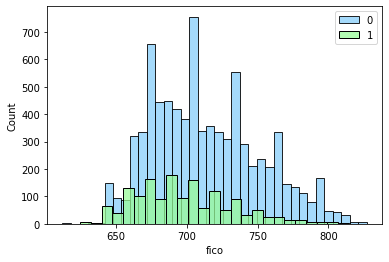

In [271]:
#2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.
sns.histplot(data = df_loan['fico'][df_loan['not_fully_paid'] == 0], color = '#87CEFA', label = '0')
sns.histplot(data = df_loan['fico'][df_loan['not_fully_paid'] == 1], color = '#98FB98', label = '1')

plt.legend()


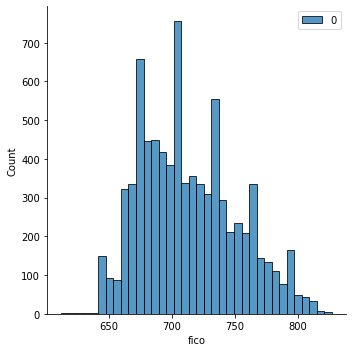

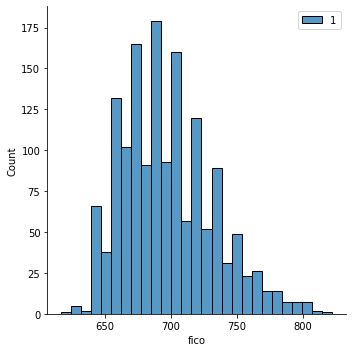

In [272]:
# метод с урока у меня не сработал. график делился на две отдельные гистограммы
for i in df_loan.not_fully_paid.unique():
    sns.displot(df_loan['fico'][df_loan['not_fully_paid'] == i], label =  i)
    plt.legend()

## 3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

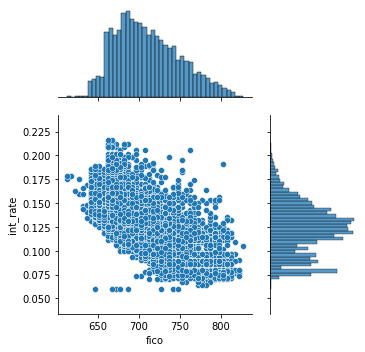

In [273]:
#3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot
sns.jointplot(data = df_loan, x = 'fico', y = 'int_rate', height=5, ratio=2)


## 4.Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

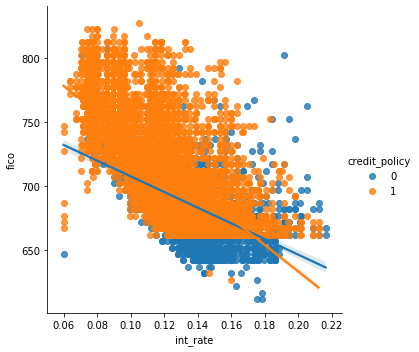

In [274]:
# 4.Побудуйте графік lmplot на основі int.rate та fico. 
# Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції
sns.lmplot(data = df_loan, x = 'int_rate', y = 'fico', hue = 'credit_policy')


## 5.purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [275]:
# 5.purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies
df_loan = df_loan.merge(pd.get_dummies(df_loan['purpose'], prefix = 'purpose'), left_index = True, right_index = True)
df_loan = df_loan.drop(['purpose'], axis = 1)

df_loan.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [276]:
df_loan.columns

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

## 6.Розбийте датасет на тестві та трейнові дані

In [277]:
# 6.Розбийте датасет на тестві та трейнові дані
X = df_loan[['int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']]

y = df_loan['credit_policy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [284]:
X.columns

Index(['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'not_fully_paid', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

# 7.Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

### дерево рішень

In [278]:
# дерево рішень
dst = DecisionTreeClassifier()
dst.fit(X_train, y_train)
y_pred = dst.predict(X_test)

dst_train_score = round(dst.score(X_train, y_train), 3)
dst_test_score = round(dst.score(X_test,y_test), 3)

dst_class_report = classification_report(y_test, y_pred, digits = 3)
dst_confusion_matrix = confusion_matrix(y_test, y_pred)


dst_n_leaves = dst.get_n_leaves()
dst_depth = dst.get_depth()

print(f'dst_n_leaves - {dst_n_leaves}', f'dst_depth - {dst_depth}', sep = '\n')
print()
print(f'dst_train_score - {dst_train_score}', f'dst_test_score - {dst_test_score}', sep = '\n')
print()
print('dst_confusion_matrix :', dst_confusion_matrix, 'dst_class_report: ', dst_class_report, sep = '\n\n')




dst_n_leaves - 62
dst_depth - 14

dst_train_score - 1.0
dst_test_score - 0.99

dst_confusion_matrix :

[[ 535   14]
 [  14 2311]]

dst_class_report: 

              precision    recall  f1-score   support

           0      0.974     0.974     0.974       549
           1      0.994     0.994     0.994      2325

    accuracy                          0.990      2874
   macro avg      0.984     0.984     0.984      2874
weighted avg      0.990     0.990     0.990      2874



### НЕполучившиеся попытки воспользоваться dtreeviz

In [285]:

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dst, feature_names=X.columns,  filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree") 

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [261]:
df_loan.columns[0]

'credit_policy'

In [22]:
feature_names_ = df_loan.columns[1:20]


viz = dtreeviz(dst, X_train, y_train, feature_names = feature_names_, target_name = 'credit_policy')
viz


# viz = dtreeviz(regr,
#                X_train,
#                y_train,
#                target_name='price',  # this name will be displayed at the leaf node
#                feature_names=boston.feature_names,
#                title="Boston data set regression",
#                fontname="Arial",
#                title_fontsize=16,
#                colors = {"title":"purple"}
#               )

# viz = dtreeviz(clf, X, y,
#                 target_name="target",
#                 feature_names=iris.feature_names,
#                 class_names=list(iris.target_names))

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

### логістична регресія

In [286]:
#логістична регресія
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg_train_score = round(logreg.score(X_train, y_train), 3)
logreg_test_score = round(logreg.score(X_test,y_test), 3)

logreg_clas_report = classification_report(y_test, y_pred_logreg, digits = 3)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)


print(f'logreg_train_score - {logreg_train_score}', f'logreg_test_score - {logreg_test_score}', sep = '\n')
print()
print('logreg_clas_report: ', logreg_clas_report, 'logreg_conf_matrix: ', logreg_conf_matrix, sep = '\n')



logreg_train_score - 0.896
logreg_test_score - 0.899

logreg_clas_report: 
              precision    recall  f1-score   support

           0      0.831     0.592     0.691       549
           1      0.910     0.972     0.940      2325

    accuracy                          0.899      2874
   macro avg      0.870     0.782     0.816      2874
weighted avg      0.895     0.899     0.892      2874

logreg_conf_matrix: 
[[ 325  224]
 [  66 2259]]


### random forest

In [287]:
# random forest
randfc = RandomForestClassifier(n_estimators = 50)
randfc.fit(X_train, y_train)

y_pred_randfc = randfc.predict(X_test)

randfc_train_score = round(randfc.score(X_train, y_train), 3)
randfc_test_score = round(randfc.score(X_test,y_test), 3)

randfc_clas_report = classification_report(y_test, y_pred_randfc, digits = 3)
randfc_conf_matrix = confusion_matrix(y_test, y_pred_randfc)

print(f'randfc_train_score - {randfc_train_score}', f'randfc_test_score - {randfc_test_score}', sep = '\n')
print()
print('randfc_clas_report: ', randfc_clas_report, 'randfc_conf_matrix: ', randfc_conf_matrix, sep = '\n')



randfc_train_score - 1.0
randfc_test_score - 0.992

randfc_clas_report: 
              precision    recall  f1-score   support

           0      0.992     0.964     0.978       549
           1      0.991     0.998     0.995      2325

    accuracy                          0.992      2874
   macro avg      0.992     0.981     0.986      2874
weighted avg      0.992     0.992     0.992      2874

randfc_conf_matrix: 
[[ 529   20]
 [   4 2321]]


### XGBoost

In [288]:
# XGBoost
xgb = XGBClassifier(n_estimators = 50, max_depth = 10, eval_metric='logloss') #learning_rate = 0.02
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_train_score = round(xgb.score(X_train, y_train), 3)
xgb_test_score = round(xgb.score(X_test,y_test),3)

xgb_clas_report = classification_report(y_test, y_pred_xgb, digits = 3)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print()
print(f'xgb_train_score - {xgb_train_score}', f'xgb_test_score - {xgb_test_score}', sep = '\n' )
print()
print('xgb_clas_report:', xgb_clas_report, sep = '\n')
print()
print('xgb_conf_matrix:', xgb_conf_matrix, sep = '\n' )




xgb_train_score - 1.0
xgb_test_score - 0.99

xgb_clas_report:
              precision    recall  f1-score   support

           0      0.980     0.969     0.974       549
           1      0.993     0.995     0.994      2325

    accuracy                          0.990      2874
   macro avg      0.986     0.982     0.984      2874
weighted avg      0.990     0.990     0.990      2874


xgb_conf_matrix:
[[ 532   17]
 [  11 2314]]


In [289]:
# промежуточная функция для общей сборки результатов
def params_from_models(x):
    list0 = []
    accuracy = x[202:207]
    weighted_avg = x[310:315]
    precision_weighted_avg = x[290:295]
    recall_weighted_avg = x[300:305]
    list0.append(accuracy)
    list0.append(weighted_avg)
    list0.append(precision_weighted_avg) 
    list0.append(recall_weighted_avg)
    return list0

#__ для общей сборки результатов
dst_results = ['DecisionTree']
dst_results.extend(params_from_models(dst_class_report))
dst_results.append(dst_train_score)
dst_results.append(dst_test_score)

#__ для общей сборки результатов
logreg_results = ['LogisticRegression']
logreg_results.extend(params_from_models(logreg_clas_report))
logreg_results.append(logreg_train_score)
logreg_results.append(logreg_test_score)

#__ для общей сборки результатов. ЗАпустить после исправления ошибок
randfc_results = ['RandomForest']
randfc_results.extend(params_from_models(randfc_clas_report))
randfc_results.append(randfc_train_score)
randfc_results.append(randfc_test_score)

#__ для общей сборки результатов
xgb_results = ['XGBoost']
xgb_results.extend(params_from_models(xgb_clas_report))
xgb_results.append(xgb_train_score)
xgb_results.append(xgb_test_score)

#__ датафрейм с результатами
columns = ['model', 'accuracy', 'weighted_avg', 'precision_weighted_avg', 'recall_weighted_avg', 'train_score', 'test_score']


df_results = pd.DataFrame(data = [dst_results, logreg_results, randfc_results, xgb_results],\
                    columns = columns).reset_index(drop=True)
df_results


,model,accuracy,weighted_avg,precision_weighted_avg,recall_weighted_avg,train_score,test_score
0,DecisionTree,0.990,0.990,0.990,0.990,1.000,0.990
1,LogisticRegression,0.899,0.892,0.895,0.899,0.896,0.899
2,RandomForest,0.992,0.992,0.992,0.992,1.000,0.992
3,XGBoost,0.990,0.990,0.990,0.990,1.000,0.990


### 10. Використайте ансамбель voting для всіх моделей

In [290]:
# 10. Використайте ансамбель voting для всіх моделей

voting = VotingClassifier( estimators=[('DecisionTree', dst), ('LogisticRegression', logreg), \
                                       ('randfc', randfc), ('XGBoost', xgb)], voting='hard') # hard - голосование по большинству.

voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

voting_score_train = round(voting.score(X_train, y_train), 3)
voting_score_test = round(voting.score(X_test, y_test), 3)


for model, label in zip([dst, logreg, randfc, xgb, voting], ['DecisionTree', 'LogisticRegression', 'RandomForest' , 'XGBoost', 'Ensemble']):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.9881 (+/- 0.0075) [DecisionTree]
Accuracy: 0.8932 (+/- 0.0274) [LogisticRegression]
Accuracy: 0.9868 (+/- 0.0056) [RandomForest]
Accuracy: 0.9900 (+/- 0.0059) [XGBoost]
Accuracy: 0.9900 (+/- 0.0062) [Ensemble]


In [291]:
df_results

,model,accuracy,weighted_avg,precision_weighted_avg,recall_weighted_avg,train_score,test_score
0,DecisionTree,0.990,0.990,0.990,0.990,1.000,0.990
1,LogisticRegression,0.899,0.892,0.895,0.899,0.896,0.899
2,RandomForest,0.992,0.992,0.992,0.992,1.000,0.992
3,XGBoost,0.990,0.990,0.990,0.990,1.000,0.990


### 11. Порівняйте результати моделей та зробіть висновки

In [ ]:
#11. Порівняйте результати моделей та зробіть висновки

Самый лучший результат по точности прогноза показал Ensemble, но его Accuracy очень билзко к XGBoost. 
Поэтому обе модели считала бы лучшими.

Если рассматривать не только Accuracy, а также брать во внимание precision, recall, weighted_avg, то близкие (почти идентичные) 
показатели у моделей DecisionTree и XGBoost. Думаю, это и повлияло на итоговый результат Ensemble, так как использовался
voting='hard', т.е. голование по большинству.


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [292]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [293]:
df2 = pd.read_csv(url)

In [294]:
df2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [295]:
from datetime import datetime

### 1.Виведіть список унікальних міст з датасету

In [296]:
#1.Виведіть список унікальних міст з датасету
df2['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

### 2.Виведіть дату початку та кінця ведення даних

In [297]:
#2.Виведіть дату початку та кінця ведення даних
f" початок - {df2['date.utc'].min()}, кінць - {df2['date.utc'].max()}"

' початок - 2019-05-07 01:00:00+00:00, кінць - 2019-06-21 00:00:00+00:00'

In [298]:
df2['date_date'] = df2['date.utc'].apply(lambda x: pd.to_datetime(x))


### 3.Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю) > сделала 2 варианта представления

In [299]:
#3.Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю)?
#0 - понедельник

print('option1', df2.groupby([[i.dayofweek for i in df2['date_date']], df2['city']], as_index = False)['value'].mean().round(2), sep = '\n')
print()
print('option2', df2.groupby([df2['city'], [i.dayofweek for i in df2['date_date']]], as_index = False)['value'].mean().round(2), sep = '\n')

option1
         city  value
0   Antwerpen  27.88
1      London  23.97
2       Paris  24.86
3   Antwerpen  22.21
4      London  24.89
5       Paris  31.00
6   Antwerpen  21.12
7      London  23.46
8       Paris  29.17
9   Antwerpen  27.50
10     London  24.78
11      Paris  28.60
12  Antwerpen  28.40
13     London  26.45
14      Paris  31.62
15  Antwerpen  33.50
16     London  24.98
17      Paris  25.27
18  Antwerpen  21.90
19     London  24.86
20      Paris  23.27

option2
         city  value
0   Antwerpen  27.88
1   Antwerpen  22.21
2   Antwerpen  21.12
3   Antwerpen  27.50
4   Antwerpen  28.40
5   Antwerpen  33.50
6   Antwerpen  21.90
7      London  23.97
8      London  24.89
9      London  23.46
10     London  24.78
11     London  26.45
12     London  24.98
13     London  24.86
14      Paris  24.86
15      Paris  31.00
16      Paris  29.17
17      Paris  28.60
18      Paris  31.62
19      Paris  25.27
20      Paris  23.27


### 4.Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

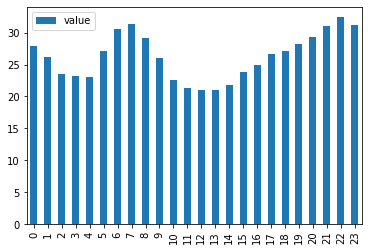

In [300]:
#4.Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?
df2.groupby([[i.hour for i in df2['date_date']]], as_index = False)['value'].mean().round(2).plot(kind='bar')